conda install tqdm seaborn

In [3]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
import pandas as pd
X = pd.DataFrame(breast["data"], columns = breast["feature_names"])
y = pd.Series(breast["target"])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

# Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf_rfc = RandomForestClassifier(criterion = 'entropy')

In [7]:
clf_rfc.fit(X = X_train, y = y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
prediction_rfc = clf_rfc.predict(X_test)

# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [10]:
best_score = 0
parameters = {}

In [11]:
from tqdm import trange

#for depth in range (1,11):
for depth in trange (1,11):
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            for criterion in ["gini", "entropy"]:
                clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = min_split, 
                                             min_samples_leaf = min_leaf, criterion = criterion)
                scores = cross_val_score(clf, X_train, y_train, cv = 5)
                if scores.mean() > best_score:
                    #print("New best parameters!")
                    parameters["best_depth"] = depth
                    parameters["best_min_split"] = min_split
                    parameters["best_min_leaf"] = min_leaf
                    parameters["best_criterion"] = criterion
                    best_score = scores.mean()
                    print("Accuracy: {}".format(scores.mean()))
                    print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, criterion: {}".format(depth, 
                                                                                                             min_split, 
                                                                                                             min_leaf, 
                                                                                                             criterion))

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9106971975393028
max_depth: 1, min_samples_split: 2, min_samples_leaf: 1, criterion: gini


 10%|█         | 1/10 [00:23<03:27, 23.10s/it]

Accuracy: 0.9158920027341081
max_depth: 2, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.9185235816814764
max_depth: 2, min_samples_split: 2, min_samples_leaf: 2, criterion: gini
Accuracy: 0.9211551606288448
max_depth: 2, min_samples_split: 2, min_samples_leaf: 7, criterion: gini
Accuracy: 0.9237867395762132
max_depth: 2, min_samples_split: 2, min_samples_leaf: 8, criterion: gini


 20%|██        | 2/10 [00:49<03:19, 24.88s/it]

Accuracy: 0.9265550239234448
max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, criterion: entropy
Accuracy: 0.92904989747095
max_depth: 3, min_samples_split: 2, min_samples_leaf: 8, criterion: entropy
Accuracy: 0.9291524265208475
max_depth: 3, min_samples_split: 2, min_samples_leaf: 9, criterion: entropy
Accuracy: 0.9343472317156527
max_depth: 3, min_samples_split: 2, min_samples_leaf: 11, criterion: entropy
Accuracy: 0.9396103896103896
max_depth: 3, min_samples_split: 2, min_samples_leaf: 13, criterion: entropy


 30%|███       | 3/10 [01:23<03:15, 28.00s/it]

Accuracy: 0.9422077922077922
max_depth: 4, min_samples_split: 11, min_samples_leaf: 1, criterion: entropy


100%|██████████| 10/10 [05:59<00:00, 35.96s/it]


In [12]:
clf_dtc = DecisionTreeClassifier(criterion = parameters["best_criterion"], max_depth = parameters['best_depth'], 
                                 min_samples_split = parameters["best_min_split"], 
                                 min_samples_leaf = parameters["best_min_leaf"])

In [13]:
clf_dtc.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
prediction_dtc = clf_dtc.predict(X_test)

In [15]:
results = pd.DataFrame({"y_true":y_test, "y_dtc":prediction_dtc, "y_rfc": prediction_rfc})

In [16]:
results.shape

(188, 3)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
import seaborn as sns

# Confusion matrix Decision Tree Classifier

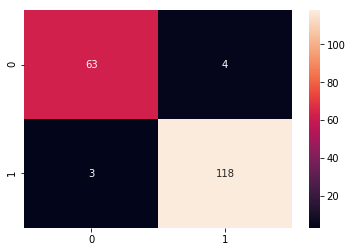

In [19]:
cm_dtc = confusion_matrix(y_true = results["y_true"], y_pred = results["y_dtc"])
sns.heatmap(cm_dtc, annot = True, fmt="d")

# Confusion matrix Random Forest Classifier

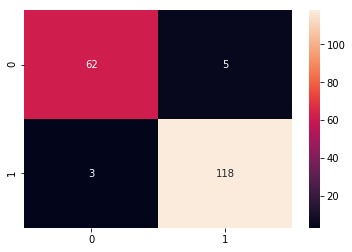

In [20]:
cm_rfc = confusion_matrix(y_true = results["y_true"], y_pred = results["y_rfc"])
sns.heatmap(cm_rfc, annot = True, fmt="d")